In [6]:
import tensorflow as tf
import numpy as np
import math
import time
from matplotlib import pyplot as plt
from hw2_utils import run_model, get_CIFAR10_data
%matplotlib inline

## Load Datasets

In [7]:
# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


## 5.2 Model1 (Simple Model) (CPU)

### Some useful utilities

. Remember that our image data is initially N x H x W x C, where:
* N is the number of datapoints
* H is the height of each image in pixels
* W is the height of each image in pixels
* C is the number of channels (usually 3: R, G, B)

This is the right way to represent the data when we are doing something like a 2D convolution, which needs spatial understanding of where the pixels are relative to each other. When we input image data into fully connected affine layers, however, we want each data example to be represented by a single vector -- it's no longer useful to segregate the different channels, rows, and columns of the data.

### The example model itself

The first step to training your own model is defining its architecture.

Here's an example of a convolutional neural network defined in TensorFlow -- try to understand what each line is doing, remembering that each layer is composed upon the previous layer. We haven't trained anything yet - that'll come next - for now, we want you to understand how everything gets set up. 

In that example, you see 2D convolutional layers (Conv2d), ReLU activations, and fully-connected layers (Linear). You also see the Hinge loss function, and the Adam optimizer being used. 

Make sure you understand why the parameters of the Linear layer are 5408 and 10.

### TensorFlow Details
In TensorFlow, much like in our previous notebooks, we'll first specifically initialize our variables, and then our network model.

In [8]:
# clear old variables
tf.reset_default_graph()

# setup input (e.g. the data that changes every batch)
# The first dim is None, and gets sets automatically based on batch size fed in
X = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int64, [None])
is_training = tf.placeholder(tf.bool)

def model1(X,y):
    # define our weights (e.g. init_two_layer_convnet)
    
    # setup variables
    Wconv1 = tf.get_variable("Wconv1", shape=[7, 7, 3, 32])
    bconv1 = tf.get_variable("bconv1", shape=[32])
    W1 = tf.get_variable("W1", shape=[5408, 10])
    b1 = tf.get_variable("b1", shape=[10])

    # define our graph (e.g. two_layer_convnet)
    a1 = tf.nn.conv2d(X, Wconv1, strides=[1,2,2,1], padding='VALID') + bconv1
    h1 = tf.nn.relu(a1)
    h1_flat = tf.reshape(h1,[-1,5408])
    y_out = tf.matmul(h1_flat,W1) + b1
    return y_out

y_out = model1(X,y)

# define our loss
total_loss = tf.losses.hinge_loss(tf.one_hot(y,10),logits=y_out)
mean_loss = tf.reduce_mean(total_loss)

# define our optimizer
optimizer = tf.train.AdamOptimizer(5e-4) # select optimizer and set learning rate
train_step = optimizer.minimize(mean_loss)

TensorFlow supports many other layer types, loss functions, and optimizers - you will experiment with these next. Here's the official API documentation for these (if any of the parameters used above were unclear, this resource will also be helpful). 

* Layers, Activations, Loss functions : https://www.tensorflow.org/api_guides/python/nn
* Optimizers: https://www.tensorflow.org/api_guides/python/train#Optimizers
* BatchNorm: https://www.tensorflow.org/api_docs/python/tf/layers/batch_normalization

### Training the model on one epoch
While we have defined a graph of operations above, in order to execute TensorFlow Graphs, by feeding them input data and computing the results, we first need to create a `tf.Session` object. A session encapsulates the control and state of the TensorFlow runtime. For more information, see the TensorFlow [Getting started](https://www.tensorflow.org/get_started/get_started) guide.

Optionally we can also specify a device context such as `/cpu:0` or `/gpu:0`. For documentation on this behavior see [this TensorFlow guide](https://www.tensorflow.org/tutorials/using_gpu)

You should see a validation loss of around 0.4 to 0.6 and an accuracy of 0.30 to 0.4 below

Training
Iteration 0: with minibatch training loss = 14.6 and accuracy of 0.094
Iteration 100: with minibatch training loss = 0.996 and accuracy of 0.28
Iteration 200: with minibatch training loss = 0.691 and accuracy of 0.42
Iteration 300: with minibatch training loss = 0.787 and accuracy of 0.31
Iteration 400: with minibatch training loss = 0.615 and accuracy of 0.33
Iteration 500: with minibatch training loss = 0.566 and accuracy of 0.28
Iteration 600: with minibatch training loss = 0.446 and accuracy of 0.33
Iteration 700: with minibatch training loss = 0.504 and accuracy of 0.42
Epoch 1, Overall loss = 0.784 and accuracy of 0.306


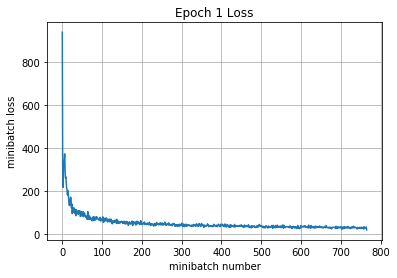

Validation
Epoch 1, Overall loss = 0.452 and accuracy of 0.375


In [9]:
with tf.Session() as sess:
    with tf.device("/cpu:0"): #"/cpu:0" or "/gpu:0" 
        sess.run(tf.global_variables_initializer())
        print('Training')
        run_model(sess,y_out,mean_loss,X,y,is_training,X_train,y_train,1,64,100,train_step,True)
        print('Validation')
        run_model(sess,y_out,mean_loss,X,y,is_training,X_val,y_val,1,64)

## 5.3 Model 2 (Implement a specific model )

Please complete function `model2()` in `hw2_part3_cpu.py`, Then run the following 2 cells to test your model

In [10]:
from hw2_part3_cpu import model2
# clear old variables
tf.reset_default_graph()

# define our input (e.g. the data that changes every batch)
# The first dim is None, and gets sets automatically based on batch size fed in
X = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int64, [None])
is_training = tf.placeholder(tf.bool)

# define model
y_out = model2(X,y,is_training)

To make sure you're doing the right thing, use the following tool to check the dimensionality of your output (it should be 64 x 10, since our batches have size 64 and the output of the final affine layer should be 10, corresponding to our 10 classes):

In [11]:
# Now we're going to feed a random batch into the model 
# and make sure the output is the right size
x = np.random.randn(64, 32, 32,3)
with tf.Session() as sess:
    with tf.device("/cpu:0"): #"/cpu:0" or "/gpu:0"
        tf.global_variables_initializer().run()
        ans = sess.run(y_out,feed_dict={X:x,is_training:True})
        print(ans.shape)
        print(np.array_equal(ans.shape, np.array([64, 10])))

(64, 10)
True


You should see the following from the run above 

`(64, 10)`

`True`

## 5.4 GPU 

Starting from this section, you have to use the server. Copy your result of running `hw3_part3_gpu.py` here. 

In [ ]:
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
2018-03-21 00:10:38.601643: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2018-03-21 00:10:39.046150: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1030] Found device 0 with properties: 
name: Tesla P100-PCIE-16GB major: 6 minor: 0 memoryClockRate(GHz): 1.3285
pciBusID: 0000:81:00.0
totalMemory: 15.89GiB freeMemory: 15.60GiB
2018-03-21 00:10:39.046220: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1120] Creating TensorFlow device (/device:GPU:0) -> (device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:81:00.0, compute capability: 6.0)
2018-03-21 00:10:41.540435: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1120] Creating TensorFlow device (/device:GPU:0) -> (device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:81:00.0, compute capability: 6.0)
Training
Iteration 0: with minibatch training loss = 3.56 and accuracy of 0.094
Iteration 100: with minibatch training loss = 2.09 and accuracy of 0.38
Iteration 200: with minibatch training loss = 1.92 and accuracy of 0.34
Iteration 300: with minibatch training loss = 2.13 and accuracy of 0.38
Iteration 400: with minibatch training loss = 1.44 and accuracy of 0.55
Iteration 500: with minibatch training loss = 1.16 and accuracy of 0.62
Iteration 600: with minibatch training loss = 1.35 and accuracy of 0.48
Iteration 700: with minibatch training loss = 1.7 and accuracy of 0.53
Epoch 1, Overall loss = 1.74 and accuracy of 0.441
Validation
Epoch 1, Overall loss = 1.75 and accuracy of 0.486

## 5.5 Train Your own Model

Copy your best result of running `hw3_part3_mymodel.py` here. 


In [2]:
(myenv) [dfreilic@gpu015 dfreilic]$ python hw2_part3_mymodel.py 
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
2018-03-22 13:15:39.753236: I tensorflow/core/platform/cpu_feature_guard.cc:137] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2018-03-22 13:15:40.177364: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1030] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:8a:00.0
totalMemory: 11.17GiB freeMemory: 11.10GiB
2018-03-22 13:15:40.177411: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1120] Creating TensorFlow device (/device:GPU:0) -> (device: 0, name: Tesla K80, pci bus id: 0000:8a:00.0, compute capability: 3.7)
2018-03-22 13:15:41.758993: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1120] Creating TensorFlow device (/device:GPU:0) -> (device: 0, name: Tesla K80, pci bus id: 0000:8a:00.0, compute capability: 3.7)
Training
Iteration 0: with minibatch training loss = 4.29 and accuracy of 0.14
Iteration 500: with minibatch training loss = 1.33 and accuracy of 0.53
Epoch 1, Overall loss = 1.31 and accuracy of 0.53
Iteration 1000: with minibatch training loss = 1.16 and accuracy of 0.62
Iteration 1500: with minibatch training loss = 0.809 and accuracy of 0.75
Epoch 2, Overall loss = 0.882 and accuracy of 0.69
Iteration 2000: with minibatch training loss = 0.579 and accuracy of 0.78
Epoch 3, Overall loss = 0.707 and accuracy of 0.753
Iteration 2500: with minibatch training loss = 0.72 and accuracy of 0.75
Iteration 3000: with minibatch training loss = 0.717 and accuracy of 0.78
Epoch 4, Overall loss = 0.594 and accuracy of 0.794
Iteration 3500: with minibatch training loss = 0.722 and accuracy of 0.73
Epoch 5, Overall loss = 0.51 and accuracy of 0.82
Iteration 4000: with minibatch training loss = 0.312 and accuracy of 0.92
Iteration 4500: with minibatch training loss = 0.346 and accuracy of 0.86
Epoch 6, Overall loss = 0.441 and accuracy of 0.846
Iteration 5000: with minibatch training loss = 0.355 and accuracy of 0.86
Epoch 7, Overall loss = 0.377 and accuracy of 0.869
Iteration 5500: with minibatch training loss = 0.359 and accuracy of 0.89
Iteration 6000: with minibatch training loss = 0.142 and accuracy of 0.97
Epoch 8, Overall loss = 0.318 and accuracy of 0.888
Iteration 6500: with minibatch training loss = 0.299 and accuracy of 0.88
Epoch 9, Overall loss = 0.272 and accuracy of 0.904
Iteration 7000: with minibatch training loss = 0.332 and accuracy of 0.89
Iteration 7500: with minibatch training loss = 0.21 and accuracy of 0.92
Epoch 10, Overall loss = 0.229 and accuracy of 0.919
Iteration 8000: with minibatch training loss = 0.186 and accuracy of 0.94
Epoch 11, Overall loss = 0.203 and accuracy of 0.929
Iteration 8500: with minibatch training loss = 0.123 and accuracy of 0.97
Iteration 9000: with minibatch training loss = 0.25 and accuracy of 0.92
Epoch 12, Overall loss = 0.174 and accuracy of 0.94
Iteration 9500: with minibatch training loss = 0.159 and accuracy of 0.92
Epoch 13, Overall loss = 0.156 and accuracy of 0.946
Iteration 10000: with minibatch training loss = 0.133 and accuracy of 0.94
Iteration 10500: with minibatch training loss = 0.244 and accuracy of 0.92
Epoch 14, Overall loss = 0.141 and accuracy of 0.951
Iteration 11000: with minibatch training loss = 0.182 and accuracy of 0.94
Epoch 15, Overall loss = 0.123 and accuracy of 0.957
Validation
Epoch 1, Overall loss = 1.08 and accuracy of 0.79
Test
Epoch 1, Overall loss = 1.16 and accuracy of 0.763

SyntaxError: invalid syntax (<ipython-input-2-b63105d9e5b0>, line 1)

### Report your work


With an architecture of:
    
Layer 1: Conv2D (5x5x64)

    Batch Norm
    Max Pool (3x3, Stride of 2)   
Layer 2: 

    Conv2D (5x5x64)
    Batch Norm
    Max Pool (3x3, Stride of 2)    
Layer 3: 

    Conv2d (3x3x128)
    Relu
    Batch Norm (Empirical evidence showed that it raised accuracy if placed after Relu activation here, then before)   
Layer 4: 

    Conv2d (3x3x128)
    Relu (No Batch Norm here, empirical evidence showed that it lowered accuracy)   
Layer 5: 

    Conv2d (3x3x128)
    Relu
    Batch Norm    
    Max Pool (3x3, Stride of 2)    
Layer 6: 

    Fully Connected (Output 384), Relu Activation
Layer 7: 

    Fully Connected (Output 192), Relu Activation
Out Layer: 

    Fully Connected (Output 10)

Optimizer: AdamOptimizer(.001) (when I tried RMSPropOptimizer, the loss increased (by 0.66) and the accuracy dropped (by .077). Similarly, GradientDescentOptimizer, Adagrad, Adadelta and others performed worse for me than AdamOptimizer)

Loss: Cross Entropy Loss

Learning Rate: 0.001 – I tried adjusting it, and I found that this ended up having the best accuracy with m

I got various results for *Validation*, based on how many epochs I ran it for:

    6 Epochs: Overall loss = 0.852 and accuracy of 0.757
    10 Epochs: Overall loss = 0.923 and accuracy of 0.765
    30 Epochs: Overall loss = 1.22 and accuracy of 0.795
    100 Epochs: Overall loss = 1.51 and accuracy of 0.831

The architecuture was built, based off of a model on Github (https://github.com/exelban/tensorflow-cifar-10), with some adjustments. I used batch normalization, instead of the LRN they used. I played with the learning rate, as well as various elements of the networks, trying various sizes of conv layers (both kernel sizes, as well as number of kernels), adding and removing some max pools (including strides), and adding in some other regularization. In the end, I found that this had a fairly good result, with some variance. I typically ran it for 6 epochs to try it out, and then 30 if I wanted a fairly good test. I originally tried using the tensorflow basic model, though I found that it didn't have fantastic accuracy, and gradually built up until I found that this model worked fairly well. I spent a fair amount of time playing with some different optimizers as well, and AdamOptimizer had a fair advantage over the ones I tried. 

I found that the length of this architecture was pretty good, allowing the network to learn a lot from the images, and upped my accuracy by a fair percentage. At the same time, because we were dealing with CIFAR-10 images, a longer network didn't seem to work as well, because the original images were small enough that extending it didn't really help validation accuracy much. One thing that I hope to implement in the future is creating more images, by adapting some of the original cifar10 images, so that I can make a larger dataset, and see if I can train a more robust, larger network with that. 

### Report your Test Accuracy - Only do this once

In [4]:
Validation:
    Epoch 1, Overall loss = 1.08 and accuracy of 0.79
Test:
    Epoch 1, Overall loss = 1.16 and accuracy of 0.763

SyntaxError: invalid syntax (<ipython-input-4-6156a0791212>, line 1)

When I ran it for 15 epochs (with a shortage of XSEDE resources, I was running short on time), I got a validation accuracy of .79 and a test accuracy of 0.763. It was relatively similar, which was nice to see, though the test accuracy was still smaller than the validation accuracy, which makes sense. 